In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from scipy.interpolate import CubicSpline
import seaborn as sns
import pandas as pd

# 1. Membuat dataset hipotetis

In [2]:
np.random.seed(42)  # Untuk hasil yang konsisten
n_samples = 200
pendapatan = np.random.normal(50000, 15000, n_samples)  # Pendapatan dalam dolar
pengeluaran = 0.5 * pendapatan + np.random.normal(0, 5000, n_samples)  # Pengeluaran konsumsi

In [3]:
data = pd.DataFrame({
    "Pendapatan": pendapatan,
    "Pengeluaran Konsumsi": pengeluaran
})
data

,Pendapatan,Pengeluaran Konsumsi
0,57450.712295,30514.292949
1,47926.035482,26766.940373
2,59715.328072,35272.920252
3,72845.447846,41691.734183
4,46487.699379,16355.502850
...,...,...
195,55779.760696,25544.002087
196,36742.138457,9805.396583
197,52305.876589,32922.300165
198,50873.130777,24863.866162


# 2. Visualisasi data asli

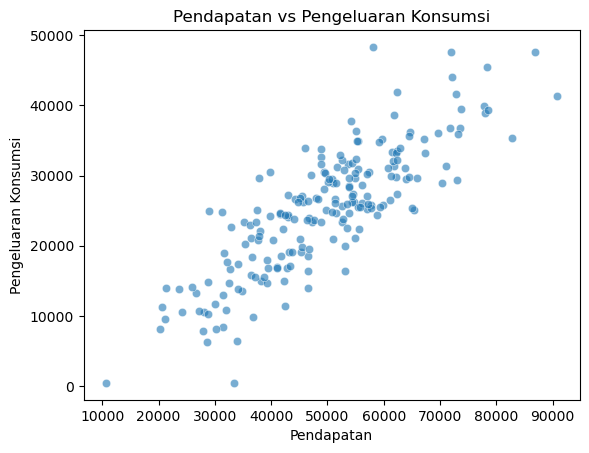

In [4]:
sns.scatterplot(data=data, x="Pendapatan", y="Pengeluaran Konsumsi", alpha=0.6)
plt.title("Pendapatan vs Pengeluaran Konsumsi")
plt.show()

Secara visual pendapatan dan pengeluaran konsumsi memiliki korelasi positif

# 3. Regresi Lowess untuk mengidentifikasi tren nonparametrik

In [5]:
# Menggunakan nilai `frac=0.2` untuk smoothing
lowess = sm.nonparametric.lowess(pengeluaran, pendapatan, frac=0.2)

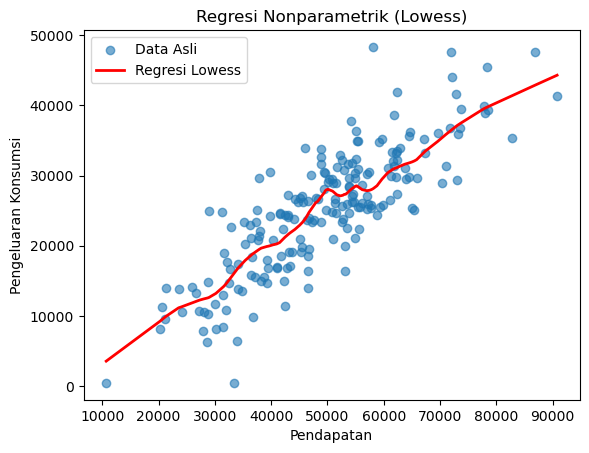

In [6]:
plt.scatter(pendapatan, pengeluaran, alpha=0.6, label='Data Asli')
plt.plot(lowess[:, 0], lowess[:, 1], color='red', linewidth=2, label='Regresi Lowess')
plt.title("Regresi Nonparametrik (Lowess)")
plt.xlabel("Pendapatan")
plt.ylabel("Pengeluaran Konsumsi")
plt.legend()
plt.show()

Secara visual pendapatan dan pengeluaran konsumsi memiliki korelasi positif

# 4. Analisis hasil regresi

Analisis visual menunjukkan hubungan linear yang kuat dengan variasi nonparametrik di beberapa titik pendapatan.
Ketika pendapatan rendah, pengeluaran cenderung bervariasi lebih tinggi (indikasi variabilitas yang lebih besar).
Ketika pendapatan meningkat, pengeluaran menunjukkan tren yang lebih stabil.

# 5. Statistik Deskriptif Data Prediksi

In [8]:
# Mengubah hasil LOWESS menjadi DataFrame untuk mudah dibaca
lowess_df = pd.DataFrame(lowess, columns=['Pendapatan', 'Pengeluaran Prediksi'])

# Menghitung statistik ringkasan
stats_summary = lowess_df.describe()
print("Statistik Ringkasan:")
print(stats_summary)

Statistik Ringkasan:
         Pendapatan  Pengeluaran Prediksi
count    200.000000            200.000000
mean   49388.435522          24974.183896
std    13965.058728           7342.066153
min    10703.823439           3547.271643
25%    39423.084876          19919.778240
50%    49937.121739          27184.251307
75%    57512.787096          28497.623582
max    90802.537499          44302.005674


# Hubungan Correlation prediksi dan actual

In [9]:
correlation_original = pd.Series(pengeluaran).corr(pd.Series(pendapatan))
correlation_predicted = lowess_df['Pengeluaran Prediksi'].corr(lowess_df['Pendapatan'])

print("Korelasi antara Pendapatan dan Pengeluaran (Asli):", correlation_original)
print("Korelasi antara Pendapatan dan Pengeluaran (Prediksi):", correlation_predicted)


Korelasi antara Pendapatan dan Pengeluaran (Asli): 0.8349050756087399
Korelasi antara Pendapatan dan Pengeluaran (Prediksi): 0.9901725584081699


Korelasi Asli (Original Correlation) - 0.8349050756087399:
Korelasi antara pendapatan dan pengeluaran dalam data asli adalah 0.834. Nilai ini menunjukkan korelasi positif yang kuat, yang berarti umumnya ketika pendapatan meningkat, pengeluaran juga cenderung meningkat. Meskipun tidak sempurna (korelasi sempurna adalah 1), angka ini menunjukkan adanya hubungan yang signifikan antara pendapatan dan pengeluaran.

Korelasi Prediksi (Predicted Correlation) - 0.9901725584081699:
Korelasi antara pendapatan dan pengeluaran dalam prediksi (hasil dari model atau metode prediksi seperti LOWESS) adalah 0.990. Ini menunjukkan korelasi yang sangat kuat, hampir mendekati 1. Korelasi ini menandakan bahwa model prediksi tersebut mencerminkan hubungan yang sangat erat antara pendapatan dan pengeluaran, menunjukkan bahwa model tersebut dapat memprediksi pengeluaran berdasarkan pendapatan dengan akurasi tinggi.

Korelasi prediksi lebih tinggi daripada korelasi asli, yang mungkin menunjukkan bahwa model prediksi menangkap hubungan yang lebih linear atau konsisten antara pendapatan dan pengeluaran. Dalam data asli, korelasi mungkin dipengaruhi oleh faktor-faktor lainnya atau adanya variasi yang tidak dipertimbangkan oleh model prediksi.

# Residual Analysis

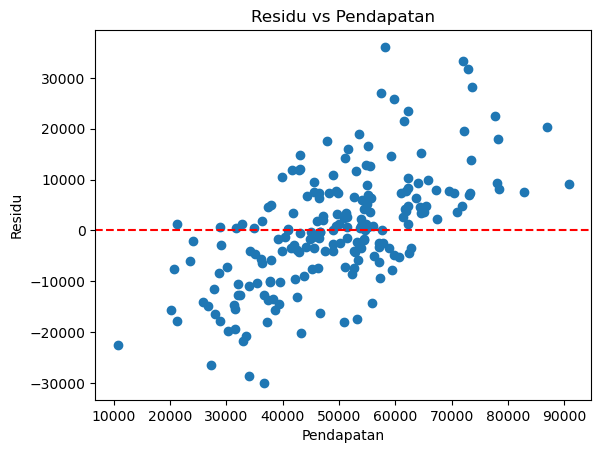

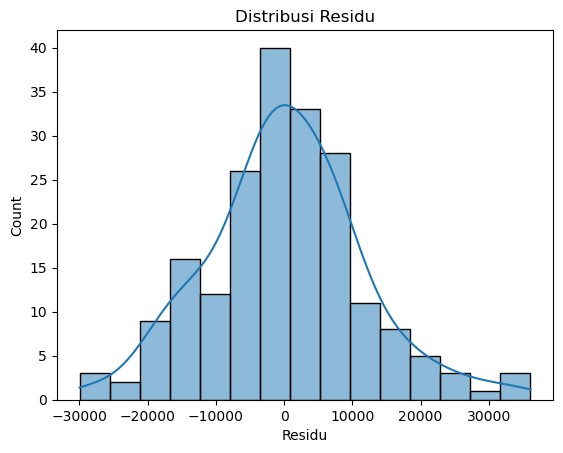

In [10]:
# Hitung residu
residuals = pengeluaran - lowess[:, 1]

# Visualisasi residu
plt.scatter(pendapatan, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residu vs Pendapatan")
plt.xlabel("Pendapatan")
plt.ylabel("Residu")
plt.show()

# Distribusi residu
sns.histplot(residuals, kde=True)
plt.title("Distribusi Residu")
plt.xlabel("Residu")
plt.show()

Pada Output yang pertama

Garis horizontal pada y=0 menunjukkan titik di mana residu adalah nol. Residu adalah perbedaan antara nilai yang diamati dan nilai yang diprediksi oleh model. Idealnya, jika model Anda sempurna, semua titik akan berada pada garis ini.

Pada grafik, dapat dilihat bahwaJika residu tampak lebih tersebar atau menyebar seiring dengan kenaikan pendapatan, ini bisa menunjukkan adanya masalah dengan heteroskedastisitas. Ini berarti variasi dalam kesalahan model meningkat dengan pendapatan, dan mungkin memerlukan penyesuaian pada model.

Pada Output yang kedua

Secara visual, distribusi residu tampak simetris dengan puncak di sekitar nol dan menyebar secara merata ke kedua arah, itu menandakan bahwa residu memiliki distribusi mendekati normal.

# Error Metrics

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Menghitung MSE
mse = mean_squared_error(pengeluaran, lowess[:, 1])
mae = mean_absolute_error(pengeluaran, lowess[:, 1])
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 129745596.18226646
Mean Absolute Error (MAE): 8664.458264618112
Root Mean Squared Error (RMSE): 11390.59244211057


Nilai MSE, MAE, dan RMSE yang cukup tinggi pada set pelatihan menunjukkan bahwa model memiliki tingkat kesalahan yang signifikan ketika melakukan prediksi pada data pelatihan.

# Cross-Validation

In [12]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi set pelatihan dan pengujian
pendapatan_train, pendapatan_test, pengeluaran_train, pengeluaran_test = train_test_split(pendapatan, pengeluaran, test_size=0.2, random_state=42)

# Terapkan LOWESS pada set pelatihan
lowess_train = sm.nonparametric.lowess(pengeluaran_train, pendapatan_train, frac=0.2)

# Prediksi pada data pengujian
from scipy.interpolate import interp1d

# Membuat interpolasi untuk prediksi
interpolator = interp1d(lowess_train[:, 0], lowess_train[:, 1], kind='linear', fill_value='extrapolate')
pengeluaran_pred_test = interpolator(pendapatan_test)

# Menghitung MSE dan MAE pada data pengujian
mse_test = mean_squared_error(pengeluaran_test, pengeluaran_pred_test)
mae_test = mean_absolute_error(pengeluaran_test, pengeluaran_pred_test)
rmse_test = np.sqrt(mse_test)

print("Test Set - Mean Squared Error (MSE):", mse_test)
print("Test Set - Mean Absolute Error (MAE):", mae_test)
print("Test Set - Root Mean Squared Error (RMSE):", rmse_test)


Test Set - Mean Squared Error (MSE): 29403192.060144108
Test Set - Mean Absolute Error (MAE): 3993.966031367934
Test Set - Root Mean Squared Error (RMSE): 5422.471028981538


Nilai MSE, MAE, dan RMSE yang lebih rendah pada test set dibandingkan dengan train set adalah hal yang menarik. Ini mungkin menunjukkan bahwa model memiliki kesalahan yang lebih kecil pada data baru (test set) daripada train set.